### INTRODUCTION

**Customer Churn Prediction**

Customer retention is a primary goal for many businesses. Customer churn, also called customer attrition,signifies the tendency of customers to stop being a paying client of a particular business.The percentage of customers discontinuing their patronage within a defined timeframe encapsulates the customer churn rate or attrition rate, serving as a pivotal metric in gauging customer satisfaction.Notably, low churn rates correlate with contented clientele, while elevated churn rates indicate a substantial exit of customers from the business ecosystem.

The customer churn rate can be calculated using the following formula:

<img src="https://imgs.search.brave.com/ay2dFTcGTp4M3hNZ4KsB-3SCFuGuif1n3LBwp9zoUwM/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9hLnN0/b3J5Ymxvay5jb20v/Zi80NzAwNy81MDAw/eDI2MjUvMTM3NjY1/ZjU3YS8yMjA5MjFf/YWRqdXN0Z2xvc3Nh/cnljaHVybnJhdGVf/djAyLnBuZy9tLzE0/NDB4MA" width="300">

Some of the factors that contribute to a high/elevated churn rate include:
- Bad customer service
- Finance issues like fees and rates
- Customer changing their needs
- Customer switching to competitors
- Dissatisfaction with the products/services
- Long-time customers feeling unappreciated.

Customer churn prediction is the process of detecting which customers are likely to leave a service or cancel a subscription to a service. It is crucial for many businesses as acquiring new clients often costs more than retaining existing ones.

Applications of customer churn prediction include:
- Telecommunication
- Software as a Service (SaaS)
- Retail businesses
- Subscription-based businesses like media and video-streaming sites
- Financial institutions like Banking and Insuarance companies
- Marketing ion.

### Steps involved in customer churn prediction:
* Importing libraries
* Loading the dataset
* Exploratory Data Analysis
* Outliers using IQR method
* Cleaning and transforming the data
    * One-Hot Encoding
    * Rearranging columnns
    * Feature Scaling
    * Feature Selection
* Prediction using Logistic Regression
* Prediction using Support Vector Classifier
* Prediction using Decision Tree Classifier
* Prediction using KNN Classifier

### Importing the libraries

In [46]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 200)

### Loading the dataset

In [47]:
telco_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Exploratory Data Analysis

In [48]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
telco_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [50]:
# columns present in the dataset
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
# shape of the dataframe (rows,columns)
telco_df.shape

(7043, 21)

In [52]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
telco_df.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5844,2905-KFQUV,Female,0,Yes,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),70.40,154.8,No
2052,2038-LLMLM,Female,0,No,No,48,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.85,4946.05,No


Most of the columns in the dataset are caetegorical(data has been put into groups), while the rest are numerical.

A brief explanation for some of the features:
| Feature | Description |
| :------- |:---------------------------|
| Partner | whether customer has a partner or not|
| Dependents | whether customer has dependents or not|
| tenure| how long the customer has stayed with the company (in months)|
| OnlineBackup| whether customer has a cloude Backup or not|
| TotalCharges| the total amount the customer is charged|

In [54]:
telco_df.size

147903

In [55]:
# chacking the data types of the columns
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**TotalCharges** is given as an object datatype while it is used to represent float datatype.

In [56]:
#summary statistics
telco_df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [57]:
#checking the number of missing values per column
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset doesn't have any null values

In [58]:
#checking if the data has any duplicted data
telco_df.duplicated().sum()

0

The dataset doesn't have any duplicated data

### Cleaning the data

In [59]:
# changing the Total charges from object to float
telco_df["TotalCharges"] = pd.to_numeric(telco_df["TotalCharges"], errors="coerce")
telco_df.TotalCharges.dtype

dtype('float64')

In [60]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [61]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
# telco_df.drop('TotalCharges ', axis=1,  inplace=True)

In [63]:
telco_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [64]:
#list of categorical features
categorical_features= ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 
                       'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling','PaymentMethod']
#list of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 
#the target column
target = 'Churn'

In [65]:
# calculate the skewness of numerical data
telco_df.skew(numeric_only = True)


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

Skewness is a measure of the distortion of symmetrical distribution or asymnmetry in a dataset.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/434px-Relationship_between_mean_and_median_under_different_skewness.png" width="300">

Observations:
- **SeniorCitizen** column is right-skewed(Skewness is approximately 1.83). This means that there are more individuals with a value of 1 (indicating senior citizen status) compared to individuals with a value of 0 (indicating non-senior citizen status).
- **tenure**: Skewness is approximately 0.24, indicating a slight right-skewness. This suggests that there might be a slightly higher concentration of shorter tenure periods compared to longer ones.
- **MonthlyCharges**: Skewness is approximately -0.22, indicating a slight left-skewness. This suggests that there might be a slightly higher concentration of lower monthly charges compared to higher ones.
- **TotalCharges**: Skewness is approximately 0.96, indicating right-skewness. This suggests that there might be more individuals with lower total charges compared to those with higher total charges.


In [66]:
# checking the correlation of numerical data
telco_df.corr(numeric_only = True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


Correlation describes the strength of an association between two variables.In statistics it usually refers to the degree to which a pair of variables are linearly related. It is measured using the sample correlation coefficient(r).

Observations:

* **SeniorCitizen**:
    - Has a postive correlation with MonthlyCharges(0.220173) and TotalCharges(0.102411).This suggests that as the SeniorCitizen status increases, both charges tend to increase slightly.
    - Has a weak correlation with tenure(0.016567),suggesting a minimum relationship between the two variables.
      
* **tenure**:
    - Has a strong postive correlation with TotalCharges(0.825880), indicating that as tenure increases,the TotalCharges also tend to increase substantially.
    - Has a weak postive correlation with MonthlyCharges(0.247900), showing a slight tendency of monthly charges to increase with tenure.
    - Has a weak correlation with SeniorCitizen(0.016567).
      
* **MonthlyCharges**:
    - Has a moderate positive correlation with TotalCharges(0.651065), indicating that both variables tend to increase with each other and viceversa.
    - Has a weak positive correlation with SeniorCitizen(0.220173) and tenure(0.247900).
      
* **TotalCharges**:
    - Strong positive correlation with tenure(0.825880), indicating that as tenure increases, total charges also increase substantially.
    - Moderate positive correlation with MonthlyCharges (0.651065), as mentioned earlier.
    - Weak positive correlation with SeniorCitizen (0.102411), as mentioned earlier.

### Feature Distribution

Plotting the distributions for numerical and categorical data to check for outliers and compare feature distributions with target variable

1. Numerical feature distribution

In [67]:
telco_df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


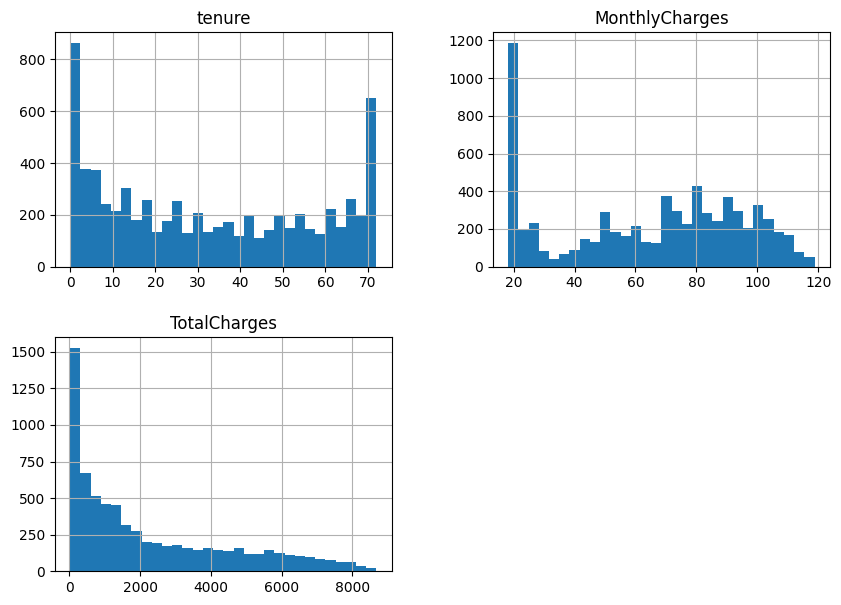

In [68]:
telco_df[numerical_features].hist(figsize=(10,7),bins=30);

Observations:

1. **Tenure Distribution:** There is a significant portion of customers with short tenure (less than 5 months) and a considerable number of customers with long tenure (more than 70 months). This suggests that the customer base includes both new customers and long-term customers who have been with the company for a substantial period.

2. **Monthly Charges Distribution:** A large number of customers seem to be on the lower end of monthly charges. This could indicate that there is a segment of the customer base that prefers or can only afford lower-priced packages.

3. **Total Charges Distribution:** Similar to monthly charges, a significant number of customers are also on the lower end of total charges. This could suggest that many customers either use lower-priced services or have been with the company for a relatively short period, resulting in lower cumulative charges.


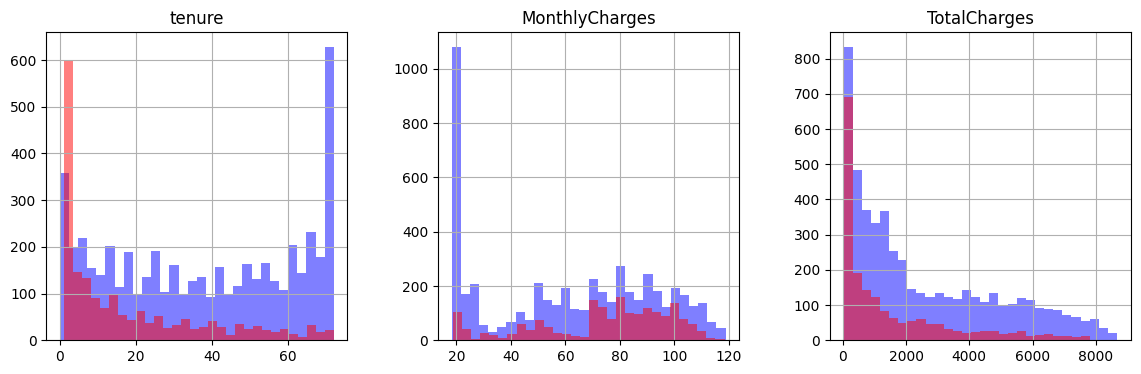

In [69]:
# distribution of numerical features in relation to target variable
fig, ax = plt.subplots(1, 3, figsize=(14,4))
telco_df[telco_df.Churn == "No"][numerical_features].hist(bins=30,color="blue",alpha=0.5,ax=ax)
telco_df[telco_df.Churn == "Yes"][numerical_features].hist(bins=30,color="red",alpha=0.5,ax=ax);

Observation:
- The longer the tenure, the lower the probability of customer churn.
- The greater the total charges, the lower the probability of customer churn.

2. Categorical feature distribution

In [70]:
# #using bar charts
# #defining the number of rows and columns
# rows,cols = 4, 4
# #creating subplots
# fig, ax = plt.subplots(rows, cols, figsize=(19,19))
# #initializing the row and col variables for indexing the subplots
# row, col = 0, 0
# #iterating over each categorical feature
# for i, categorical_feature in enumerate(categorical_features):
#     #f last column is reached, move to the next row
#     if col == cols - 1:
#         row += 1
#     # calculate the column index for current subplot
#     col = i % cols
#     #plot the value counts of each categorical feature
#     telco_df[categorical_features].value_counts().plot(kind="bar", ax=ax[row, col]).set_title(categorical_feature)


Text(0.5, 1.0, 'Not Churned')

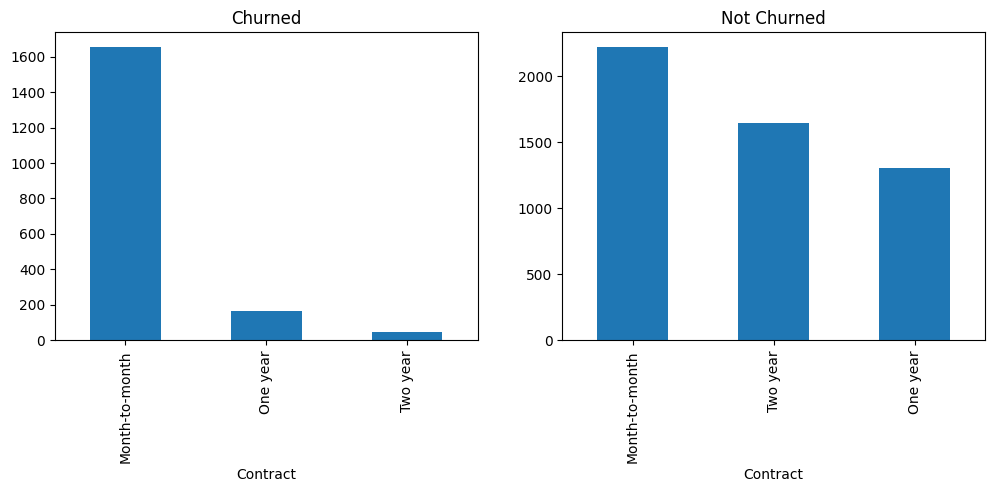

In [71]:
# categorical features in relation to the target variable
# focusing on customer contracts
ft = 'Contract'
fig, ax = plt.subplots(1,2, figsize=(12,4))
telco_df[telco_df.Churn == "Yes"][ft].value_counts().plot(kind="bar", ax=ax[0]).set_title("Churned")
telco_df[telco_df.Churn == "No"][ft].value_counts().plot(kind="bar", ax=ax[1]).set_title("Not Churned")

Observation:
Customers who have month-to-month contracts are mostlikely to churn while those with two year contracts are the least likely to chunrn.

3. Target Variable distribution

Text(0.5, 1.0, 'Churned')

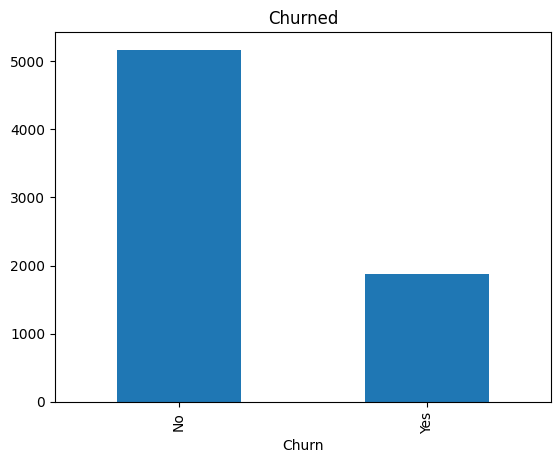

In [72]:
#using a bar plot
telco_df[target].value_counts().plot(kind='bar').set_title("Churned")

Observation:
- The target variable distribution shows that the number of customers who have not churned is greater than those who have churned.
- The dataset is therefore imbalanced,and a model would most likely predict the majority class.
- To minimize the imbalanced dataset influence, one can:
    * resample data
    * collect more sample
    * use more precision and recall as accuracy metrics

### Outliers Analysis using IQR(Interquartile range) Method

In [73]:
x = telco_df[["tenure", "MonthlyCharges"]]
x.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


Interquartile range shows how data is spread across the median.

The IQR can be used to detect outliers using the following steps:

    1. Calculate the interquartile range for the data.
    2. Multiply the IQR BY 1.5 (constant used to discern outliers)
    3. Add 1.5xIQR to the third quartile(Q3). Any number greater than this is a suspected outlier.
    4. Subtract 1.5xIQR from the first quartile(Q1). Any number less than this is a suspected outlier.

**NOTE:** Possible near outliers are identified as observations further than 1.5 x IQR from the quartiles, and possible far outliers as observations further than 3.0 x IQR from the quartiles.
    

In [74]:
#list of columns to check for outliers
x = ['tenure', 'MonthlyCharges']

#function to count outliers that takes two args; dataframe and column name
def count_outliers(data, col):
    #obtaining the quartiles
    Q1 = data[col].quantile(0.25, interpolation="nearest")
    Q2 = data[col].quantile(0.5,  interpolation="nearest")
    Q3 = data[col].quantile(0.75,  interpolation="nearest")
    Q4 = data[col].quantile(1,  interpolation="nearest")
    #the IQR
    IQR = Q3-Q1
    # global variables for the upper and lower limit
    global LL
    global UL
    #Multiply the IQR BY 1.5 (constant used to discern outliers)
    y = 1.5*IQR
    #Subtract 1.5xIQR from the first quartile(Q1)
    LL = Q1 - y
    #Add 1.5xIQR to the third quartile(Q3)
    UL = Q3 + y

    if data[col].min() > LL and data[col].max() < UL:
        print("No outliers in", i)
    else:
        print("There are outliers in",i)
        x = data[data[col] < LL][col].size
        y = data[data[col] > UL][col].size
        a.append(i)
        print('Count of outliers', x+y)
global a
a = []
# iterating over each column name in the list x and calls the fn
for i in x:
    count_outliers(telco_df,i)
        

No outliers in tenure
No outliers in MonthlyCharges


### Cleaning and transforming the data

In [75]:
#dropping columns that are not needed
telco_df.drop("customerID",axis=1, inplace=True)

In [76]:
telco_df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4680,Male,1,No,No,18,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),58.40,964.9,No
1909,Male,0,Yes,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,150.0,No


#### 1. One Hot Encoding

In [77]:
telco_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [79]:
new_telco_df = pd.get_dummies(data = telco_df,
                              columns= ['gender', 'Partner', 'Dependents','PhoneService',\
                                        'MultipleLines', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                        'StreamingMovies', 'Contract', 'PaperlessBilling',\
                                        'PaymentMethod','Churn'], drop_first=True, dtype=int)

In [80]:
new_telco_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [81]:
new_telco_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

#### 2. Rearranging the columns

In [82]:
new_telco_df = new_telco_df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes']]

In [83]:
new_telco_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [84]:
new_telco_df.shape

(7043, 31)

In [85]:
new_telco_df.isnull().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

TotalCharges has missing values which can be imputed using the mean value

In [87]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
new_telco_df['TotalCharges'] = imputer.fit_transform(new_telco_df['TotalCharges'].values.reshape(-1,1))
new_telco_df['TotalCharges'].isnull().sum()

0

#### 3. Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
#scaling the all columns except the target(Churn_Yes)
scaled_features = scaler.fit_transform(new_telco_df.drop("Churn_Yes", axis=1))

#### 4. Feature Selection

In [90]:
from sklearn.model_selection import train_test_split
#the data
X = scaled_features
y = new_telco_df["Churn_Yes"]
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Prediction using Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [99]:
logistic_predict = logistic_model.predict(X_test)
logistic_predict[:5]

array([1, 0, 0, 1, 0])

In [100]:
y_test[:5]

185     1
2715    0
3825    0
1807    1
132     0
Name: Churn_Yes, dtype: int32

In [97]:
print(classification_report(y_test, logistic_predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [101]:
confusion_matrix_logistic = confusion_matrix(y_test, logistic_predict)
confusion_matrix_logistic

array([[934, 102],
       [151, 222]], dtype=int64)

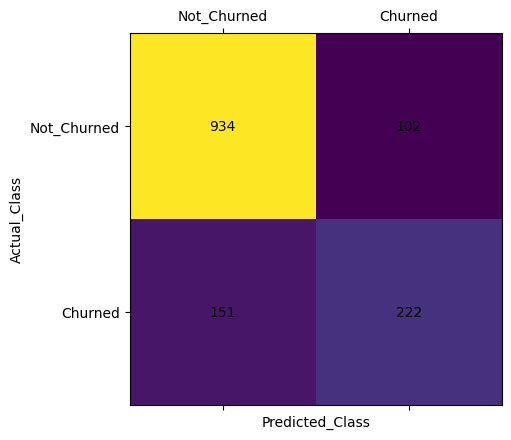

In [102]:
# creatiing a heat map for the confusion_matrix
plt.matshow(confusion_matrix(y_test, logistic_predict))
plt.xlabel("Predicted_Class")
plt.ylabel("Actual_Class")

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_logistic[i, j], ha='center', va='center')

# custom labels for the x and y ticks
plt.xticks([0, 1], ["Not_Churned", "Churned"])
plt.yticks([0, 1], ["Not_Churned", "Churned"])
plt.show()

In [103]:
logistic_model.score(X_train, y_train)

0.8031593894213702

In [131]:
logistic_model.score(X_test, y_test)

0.8204400283889283

In [104]:
accuracy_score(y_test, logistic_predict)

0.8204400283889283

The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.


### Predicting using Support Vector Classifier

In [105]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predict = svc_model.predict(X_test)
svc_predict[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [106]:
y_test[:10]

185     1
2715    0
3825    0
1807    1
132     0
1263    1
3732    0
1672    0
811     1
2526    1
Name: Churn_Yes, dtype: int32

In [108]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [109]:
confusion_matrix_svc = confusion_matrix(y_test, svc_predict)
confusion_matrix_svc

array([[948,  88],
       [174, 199]], dtype=int64)

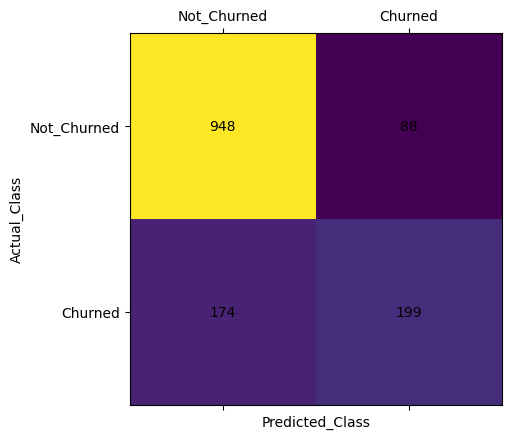

In [110]:
plt.matshow(confusion_matrix_svc)
plt.xlabel("Predicted_Class")
plt.ylabel("Actual_Class")

for i in range(2):
    for j in range(2):
        plt.text(j,i, confusion_matrix_svc[i, j], ha='center', va='center')

plt.xticks([0,1], ["Not_Churned", "Churned"])
plt.yticks([0,1], ["Not_Churned", "Churned"])
plt.show()

In [111]:
svc_model.score(X_train, y_train)

0.8152289669861554

In [112]:
accuracy_score(y_test, svc_predict)

0.8140525195173882

In [132]:
svc_model.score(X_test, y_test)

0.8140525195173882

### Prediction using Decision Tree Classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, y_train)
tree_predict = dec_tree_model.predict(X_test)
tree_predict[:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [114]:
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1036
           1       0.45      0.46      0.46       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409



In [116]:
confusion_matrix_tree = confusion_matrix(y_test, tree_predict)
confusion_matrix_tree

array([[823, 213],
       [200, 173]], dtype=int64)

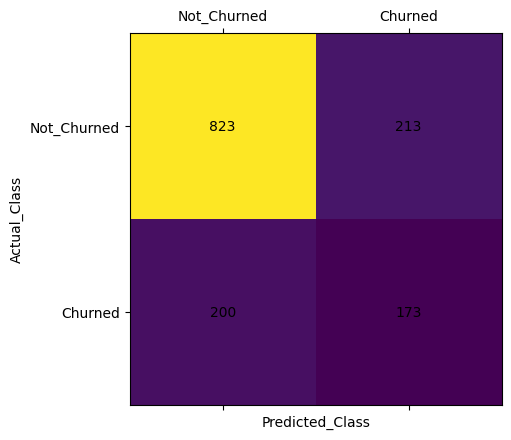

In [117]:
plt.matshow(confusion_matrix_tree)
plt.xlabel("Predicted_Class")
plt.ylabel("Actual_Class")

for i in range(2):
    for j in range(2):
        plt.text(j,i, confusion_matrix_tree[i, j], ha='center', va='center')

plt.xticks([0,1], ["Not_Churned", "Churned"])
plt.yticks([0,1], ["Not_Churned", "Churned"])
plt.show()

In [118]:
dec_tree_model.score(X_train, y_train)

0.9985800496982605

In [119]:
accuracy_score(y_test, tree_predict)

0.7068843151171044

### Prediction using KNN Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn_model =  KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [121]:
knn_predict = knn_model.predict(X_test)
knn_predict[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [122]:
# determining the optimal number of neighbors ie n_neighbors
#list to store erroe rates for different values of n_neighbors
error_rate = []

for i in range(1,40):
    #instantiate the model with i 'n_neighbors'
    knn_model = KNeighborsClassifier(n_neighbors=i)
    #fit model
    knn_model.fit(X_train, y_train)
    #generate predictions
    predict_i = knn_model.predict(X_test)
    #computes the instances where the predicted label is not equal to the actual label.
    error_rate.append(np.mean(predict_i!= y_test))

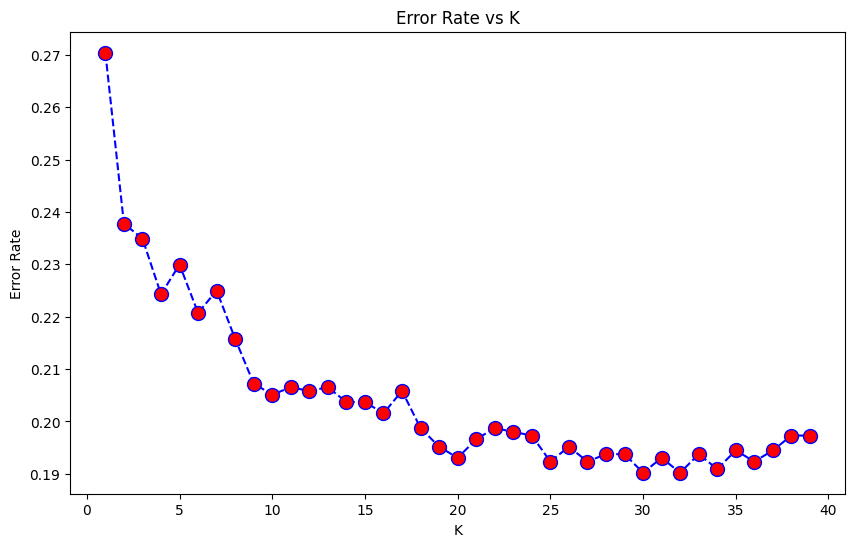

In [125]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate, color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [126]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.66      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [127]:
confusion_matrix_knn = confusion_matrix(y_test, knn_predict)
confusion_matrix_knn 

array([[926, 110],
       [158, 215]], dtype=int64)

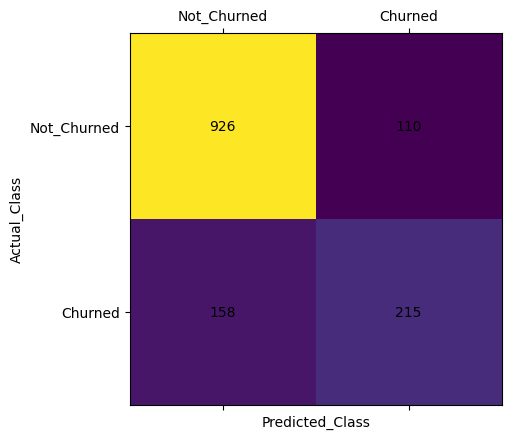

In [128]:
plt.matshow(confusion_matrix_knn)
plt.xlabel("Predicted_Class")
plt.ylabel("Actual_Class")

for i in range(2):
    for j in range(2):
        plt.text(j,i, confusion_matrix_knn[i, j], ha='center', va='center')

plt.xticks([0,1], ["Not_Churned", "Churned"])
plt.yticks([0,1], ["Not_Churned", "Churned"])
plt.show()

In [129]:
knn_model.score(X_train,y_train)

0.7976570820021299

In [130]:
accuracy_score(y_test, knn_predict)

0.8097941802696949

### Conclusion